# EDO de Segundo Orden y Aplicaciones

## Introduccion

In [436]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def solucion_sistema2x3(row1, row2, b):
    a = np.array([row1, row2])
    b = np.array(b)
    x = np.linalg.solve(a, b)

    return x[0], x[1]


def graficar_comparacion(t_analitica, x_analitica, t_om, x_om, title):
    fig, ax = plt.subplots()
    ax.plot(t_analitica, x_analitica, label='Analitico Python', lw=4, color='#ff7f0e')
    ax.plot(t_om, x_om, label='OM', ls='--', color='#17becf')
    ax.set_xlabel('time')
    ax.set_ylabel('x')
    ax.fill_between(t_analitica, x_analitica, alpha=0.3)
    ax.set_title(title)
    ax.legend()


|Grupo|$T_{1}$|$T_{2}$|$T_{s}$|     $P$     |
|:---:|:-----:|:-----:|:-----:|:-----------:|
|  10 |   9   |   7   |   4   |$\frac{1}{2}$|


## 3 Sistema mas resorte amortiguado
Considere el siguiente sistema masa-resorte-amortiguador:

<div style="display:flex;justify-content:center">
<img src="https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo3/IMG_1874.jpeg" width=300px></img>
</div>

Tal como visto en clase, $m[kg]$ representa la masa del objeto, $k[N/m]$ la
constante de elasticidad del resorte, $b[N/m/s]$ la constante del amortiguador
y $F[N]$ representa una fuerza externa aplicada al sistema. El desplazamiento
de la masa se representa por $x(t)[m]$ y se considera positivo hacia abajo.

# 4 Sistema masa resorte amortiguador sin excitación (26 puntos)
Para esta sección asuma que la fuerza aplicada es nula $F=0[N]$. Asuma un
valor de $m$ igual a su número de grupo (en kilogramos). Calcule los valores
de $b$ y $k$ necesarios para obtener<br>
***(Valor 4 puntos):***

Los valores de $T_{1}$, $T_{2}$, $T_{s}$ y $P$ correspondientes a cada grupo se reportan en
la tabla 1. Para los tiempos de establecimiento se asume el criterio de las
cinco constantes de tiempo, como establecido en clase.


a. Un sistema **sobreamortiguado**, con tiempos de establecimiento de $T_{1}$ y
$T_{2}$ respectivamente para sus dos funciones exponenciales.

#### Solución 4.a sistema sobreamortiguado
Los tiempos de establecimiento corresponmdientes para el grupo 10 segun la tabla 1 son:
$$ \begin{align} T_1=9 && T_2=7 \end{align} $$

Iniciamos con las ecuaciones<br>
$$ \begin{align} \lambda_1 = 5\left(\frac{-1}{T_1}\right) && \lambda_2 = 5\left(\frac{-1}{T_1}\right) \end{align} $$

Estas ecuaciones nos permiten determinar las raizes solucion de la ecuacion diferencial. Cabe resaltar que
seremos capaces de conocer la **solucion general** de la ecuacion diferencial sin conocer los valores
de $\beta$ y $k$ y por ende la ecuacion diferencial como tal.

Reemplazamos $T_1$ y $T_2$ respectivamente<br>
$$ \begin{align} \lambda_1 = 5\left(\frac{-1}{9}\right) && \lambda_2 = 5\left(\frac{-1}{7}\right) \end{align} $$


$$ \begin{align} \lambda_1=-\frac{5}{9}  && \lambda_2=-\frac{5}{7}  \end{align} $$

Ahora usaremos  el sistema de ecuaciones que obtuvimos en para encontrar los valores de $\beta$ y $k$.
Remplazamos respectivamente y simplificamos.<br>
$$ \begin{align} \lambda_1^2 + \frac{\beta}{m}\lambda_1+\frac{k}{m}=0 && \lambda_2^2 + \frac{\beta}{m}\lambda_2+\frac{k}{m}=0 \end{align}$$

$$ \begin{align} \left(-\frac{5}{9}\right)^2+\left(-\frac{5}{9}\right)\frac{\beta}{(10)}+\frac{k}{10}=0 && \left(-\frac{5}{7}\right)^2+\left(-\frac{5}{7}\right)\frac{\beta}{(10)}+\frac{k}{10}=0 \end{align}$$

$$ \begin{align} -\frac{\beta}{18}+\frac{k}{10}=-\frac{25}{81} && -\frac{\beta}{14}+\frac{k}{10}=-\frac{25}{49} \end{align}$$

Ahora armamos nuestra matriz y solucionamos usando la funcion escrita en python anteriormente, siendo la primera columna
$\beta$ y la segunda $k$<br>
$$ \begin{pmatrix} -\frac{1}{18} & \frac{1}{10} & -\frac{25}{81} \\ -\frac{1}{14} & \frac{1}{10} & -\frac{25}{49} \end{pmatrix} $$

In [437]:
# fila 1 de la matriz
row1 = [-1/18, 1/10]
# fila 2 de la matriz
row2 = [-1/14, 1/10]
b = [-25/81, -25/49]
# retorna constante de amortiguamiento y de resorte
beta, k = np.around(solucion_sistema2x3(row1, row2, b), 1)
print('Constante de amortiguamiento b={}\nConstante de resorte k={}'.format(beta, k))



Constante de amortiguamiento b=12.7
Constante de resorte k=4.0


b. Un sistema **subamortiguado**, con un tiempo de establecimiento de $T_{s}$ y
un pseudoperiodo de oscilación de $P$.

#### Solucion 4.b sistema subanmortiguado
$$ \begin{align}  T_s = 4 && P=\frac{1}{2} \end{align}$$

$$ \begin{align} T_s = 5\left(\frac{-1}{\sigma}\right) && P=\frac{2\pi}{\omega} \end{align}$$

$$ \begin{align} 4 = \frac{-5}{\sigma} && \frac{1}{2} = \frac{2\pi}{\omega} \end{align}$$

$$ \begin{align} \sigma = -\frac{5}{4} && \omega = 4\pi \end{align}$$

$$ \lambda = -\frac{5}{4} + 4\pi j $$

$$ \begin{align} -\frac{\beta}{2m} = -\frac{5}{4} && \left(\frac{\beta}{2m}\right)^2 - \frac{k}{m} = -(\omega)^2 \end{align}$$

$$ \begin{align} \frac{\beta}{m} = \frac{10}{4} && \left(\frac{25}{20}\right)^2 - \frac{k}{10} = -(4\pi)^2 \end{align}$$

$$ \begin{align} \beta = \frac{10}{4}m && \frac{25}{16} - \frac{k}{10} = -(4\pi)^2 \end{align}$$

$$ \begin{align} \beta = \frac{10}{4}(10) &&  - \frac{k}{10} = -(4\pi)^2  -\frac{25}{16} \end{align}$$

$$ \begin{align} \beta = \frac{100}{4} && k = -10\left( -(4\pi)^2  -\frac{25}{16}\right) \end{align}$$

$$ \begin{align} \beta = 25 && k = 1594.76 = 1595 \end{align}$$

Para cada uno de los sistemas anteriores determine manualmente la función
que representa al desplazamiento $x(t)$, asumiendo condiciones iniciales
$x(0) = 1[m]$ y $x'(0) = 0[m/s]$. Recuerde que debe reportar el procedimiento matemático.<br>
***(Valor 6 puntos).***

### Solución

Ecuacion diferencial

$$ 10\frac{d^2x}{dt^2}+\frac{800}{63}\frac{dx}{dt}+\frac{250}{63}x=0$$

$$\begin{align} x(t) = c_1e^{-\frac{5}{9}t} + c_2e^{-\frac{5}{7}t} && x'(t)=-\frac{5}{9}c_1e^{-\frac{5}{9}t}-\frac{5}{7}c_2e^{-\frac{5}{7}t} \end{align}$$

$$\begin{align} x(0) = c_1e^{-\frac{5}{9}(0)} + c_2e^{-\frac{5}{7}(0)}=1 && x'(0)=-\frac{5}{9}c_1e^{-\frac{5}{9}(0)}-\frac{5}{7}c_2e^{-\frac{5}{7}(0)} \end{align}=0$$

$$\begin{align} c_1 + c_2 =1 && -\frac{5}{9}c_1-\frac{5}{7}c_2 \end{align}=0$$

$$ \begin{pmatrix} 1 & 1 & 1 \\ -\frac{5}{9} & -\frac{5}{7} & 0 \end{pmatrix} $$

In [438]:
def constantes_sobreamortiguado():
    row1 = []
    row2 = []



Utilice **Python** para graficar las funciones obtenidas en el párrafo anterior.<br>
*¿Los tiempos de estabilización y pseudoperiodos estimados en las gráficas
coinciden con los valores solicitados?*<br>
Justifique claramente su respuesta.
Use el comando de anotación para los tiempos anteriores en la gráfica.<br>
***(Valor 6 puntos).***

### Solucion
Planteamos las funciones en python para poder graficar

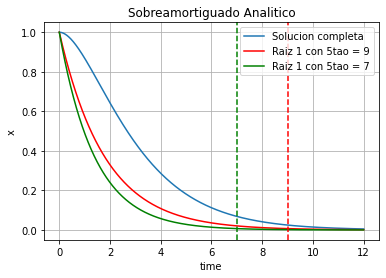

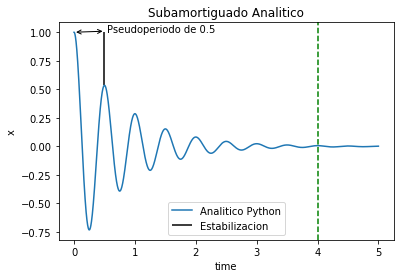

In [439]:
def xt_sobreamortiguado_analitico(t):
    return ((9/2)*np.exp(-5/9*t)) - ((7/2)*np.exp(-5/7*t))


def xt_subamortiguado_sin_excitacion_analitico(t):
    return np.exp(-5/4*t) * (np.cos(4*np.pi*t) + ((5/(16*np.pi))*np.sin(4*np.pi*t)))


def graficar_sobreamortiguado():

    t = np.linspace(0, 12, 3000)
    raiz1 = np.exp(-5/9*t)
    raiz2 = np.exp(-5/7*t)
    fig, ax = plt.subplots()
    ax.plot(t, xt_sobreamortiguado_analitico(t), label='Solucion completa')
    ax.plot(t, raiz1, label='Raiz 1 con 5tao = 9', c='red')
    ax.plot(t, raiz2, label='Raiz 1 con 5tao = 7', c='green')
    ax.axvline(9, ls='--', c='red')
    ax.axvline(7,  ls='--', c='green')
    ax.set_xlabel('time')
    ax.set_ylabel('x')
    #ax.fill_between(t_analitica, x_analitica, alpha=0.3)
    ax.set_title('Sobreamortiguado Analitico')
    ax.legend()
    ax.grid()

def graficar_subamortiguado_sin_excitacion():
    t = np.linspace(0, 5, 3000)

    fig, ax = plt.subplots()
    ax.plot(t, xt_subamortiguado_sin_excitacion_analitico(t), label='Analitico Python')
    ax.set_xlabel('time')
    ax.set_ylabel('x')
    ax.axvline(4, ls='--', c='green')
    ax.vlines(0.5, 0.5353, 1, color='black', label='Estabilizacion')
    ax.annotate('Pseudoperiodo de 0.5', xy=(0, 1), xytext=(0.5353, 1), xycoords='data', arrowprops={'arrowstyle':'<->'})
    #ax.fill_between(t_analitica, x_analitica, alpha=0.3)
    ax.set_title('Subamortiguado Analitico')
    ax.legend()

graficar_sobreamortiguado()

graficar_subamortiguado_sin_excitacion()

¿Los tiempos de estabilización y pseudoperiodos estimados en las gráficas
coinciden con los valores solicitados?
Si, En las graficas se puede observar claramente, usando anotaciones y lines verticales que los periodos de establizacion y
el pseudoperiodo segun sea el caso, corresponden a los esperados

Implemente el sistema en OpenModelica, utilizando los bloques de la librería
Mechanics - Translational y obtenga las curvas para $x(t)$ en cada uno de los
casos, estas gráficas deben ser reportadas en su informe.<br>
***(Valor 4 puntos).***

### Solucion
Para ambos casos el diagrama de bloques en open modelica se vera igual, solamente cambias los valores de los bloques



In [440]:
# Importamos los resultados obtenidos en open modelica para el sistema sobreamortiguado
df_sobreamortiguado_om = pd.read_csv('https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo3/trabajo_3_sobreamortiguado_sin_excitacion.csv')

# Importamos los resultados obtenidos en open modelica para el sistema subamortiguado sin excitacion

df_subamortiguado_sin_excitacion_om = pd.read_csv('https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo3/trabajo_3_subamortiguado_sin_excitacion.csv')

Importe las soluciones obtenidos con OpenModelica a Python. Realice una
comparación entre los resultados obtenidos en OpenModelica y los resultados
obtenidos con el procedimiento manual, sobreponiendo las gráficas
correspondientes.<br>
***(Valor 6 puntos)***.

### Solucion

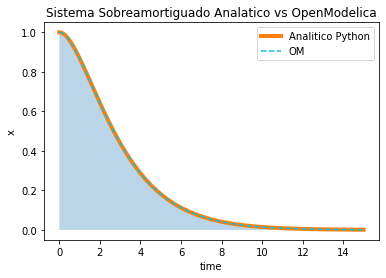

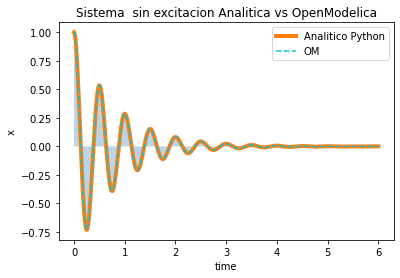

In [445]:
# Funcion que compara los resultados analiticos
def comparacion_sobreamortiguado_analitico_vs_om():
    t =  np.linspace(0, 15, 3000)
    fig, ax = plt.subplots()
    ax.plot(t, xt_sobreamortiguado_analitico(t), label='Analitico Python', lw=4, color='#ff7f0e')
    ax.plot(df_sobreamortiguado_om['time'], df_sobreamortiguado_om['mass.s'], label='OM', ls='--', color='#17becf')
    ax.set_xlabel('time')
    ax.set_ylabel('x')
    ax.fill_between(t, xt_sobreamortiguado_analitico(t), alpha=0.3)
    ax.set_title('Sistema Sobreamortiguado Analatico vs OpenModelica')
    ax.legend()


def comparacion_subamortiguado_sin_excitacion_analitico_vs_om():
    t =  np.linspace(0, 6, 3000)
    fig, ax = plt.subplots()
    ax.plot(t, xt_subamortiguado_sin_excitacion_analitico(t), label='Analitico Python', lw=4, color='#ff7f0e')
    ax.plot(df_subamortiguado_sin_excitacion_om['time'], df_subamortiguado_sin_excitacion_om['mass.s'], label='OM', ls='--', color='#17becf')
    ax.set_xlabel('time')
    ax.set_ylabel('x')
    ax.fill_between(t, xt_subamortiguado_sin_excitacion_analitico(t), alpha=0.3)
    ax.set_title('Sistema  sin excitacion Analitica vs OpenModelica')
    ax.legend()

comparacion_sobreamortiguado_analitico_vs_om()

comparacion_subamortiguado_sin_excitacion_analitico_vs_om()

Podemos observar que las graficas se sobreponen de buena manera, lo cual indica que la respuesta analitica concuerda, con la
de open modelica

## 5 Sistema masa resorte amortiguador con excitación (24 puntos)
Para realizar esta sección asuma que la fuerza externa $F(t)$ está dada por:<br>
$$ F(t) = \left\{\begin{array}\\0 & 0<t<2[s] \\c & t>2[s]\\\end{array}\right.$$

Dónde el valor de $c$ lo puede elegir libremente. Para los valores del resto de
parámetros use los mismos de la sección anterior, seleccionando uno solo de
los casos como se muestra en la siguiente tabla:

|Grupos|Caso a reutilizar|
|:---:|:-----:|
|$1,2,3,4,5,6,7,8,9,10$|Subamortiguado|
|$11,12,13,14,15,16,17,18,19,20$|Sobreamortiguado|

Obtenga una manualmente expresión para $x(t)$, obviamente se tratará de
una expresión por tramos. Recuerde reportar su procedimiento matemático<br>
***(6 puntos)***

### Solucion





Grafique la solucion utilizando Python, analice en que cambia la respuesta del sistema
al agregar la fuerza externa, comparandolo con la respuesta obtenida en la seccion 4<br>
***(6 puntos)***

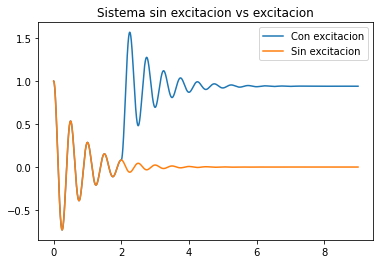

In [442]:
def constantes_subamortiguado_con_excitacion():
    row1 = [np.exp(-5/2), 0]
    row2 = [(-5/4)*np.exp(-5/2), 4*np.pi*np.exp(-5/2)]
    b = [np.exp(-5/2)-(300/319), 0]

    return solucion_sistema2x3(row1, row2, b)

# funcion analaitica a tramos en python para graficar
def xt_subamortiguado_con_excitacion_analitico(t):

    c1, c2 = constantes_subamortiguado_con_excitacion()

    t1 = t[t< 2]
    t2 = t[t>= 2]

    tramo1 = np.exp(-5/4*t1) * (np.cos(4*np.pi*t1) + ((5/(16*np.pi))*np.sin(4*np.pi*t1)))

    tramo2 = (np.exp((-5/4) * t2) * ((c1*np.cos(4*np.pi*t2)) + (c2*np.sin(4*np.pi*t2)))) + (300/319)

    return np.concatenate((tramo1, tramo2), axis=None)

def comparacion_vs_seccion_4():

    t = np.linspace(0, 9, 3000)

    xt_sin_excitacion = xt_subamortiguado_con_excitacion_analitico(t)

    xt_con_excitacion = xt_subamortiguado_sin_excitacion_analitico(t)

    fig, ax = plt.subplots()
    ax.plot(t,xt_sin_excitacion,label='Con excitacion')
    ax.plot(t, xt_con_excitacion, label='Sin excitacion')
    ax.legend()
    ax.set_title('Sistema sin excitacion vs excitacion')
    #ax.plot(t_om, x_om, label='OM', ls='--', color='#17becf')

comparacion_vs_seccion_4()


Implemente el sistema en openmodelica, agregando la fuerza al modelo
anterior (puede utilizar los bloques en Blocks - Continuous). Reporte en su
informe la grafica obtenida<br>
***(6 puntos)***.

### Solucion


In [443]:
# Resultados de open modelica guardados en archivo csv importados a traves de pandas
df_subamortiguado_con_excitacion_open_modelica = pd.read_csv('https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo3/trabajo_3_subamortiguado_con_excitacion.csv')




Importe las soluciones obtenidas con OpenModelica a Python. Realice una
comparacion entre los resultados obtenidos en OpenModelica y los resultados obtenidos
con el procedimiento manual, sobreponiendo las graficas correspondientes<br>
***(Valor 6 puntos)***

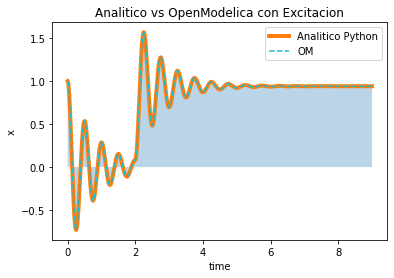

In [444]:
def sistema_subamortiguado_con_excitacion_analitico_vs_openmodelica():

    t = np.linspace(0, 9, 3000)

    xt_analitico = xt_subamortiguado_con_excitacion_analitico(t)

    fig, ax = plt.subplots()
    ax.plot(t,  xt_analitico, label='Analitico Python', lw=4, color='#ff7f0e')

    ax.plot(df_subamortiguado_con_excitacion_open_modelica['time'], df_subamortiguado_con_excitacion_open_modelica['mass.s'], label='OM', ls='--', color='#17becf')
    ax.set_xlabel('time')
    ax.set_ylabel('x')
    ax.fill_between(t,  xt_analitico, alpha=0.3)
    ax.set_title('Analitico vs OpenModelica con Excitacion')
    ax.legend()


sistema_subamortiguado_con_excitacion_analitico_vs_openmodelica()